In [1]:
import time
import os
import shutil
import sys
import h5py
import tensorflow                     as tf
import numpy                                  as np
import seaborn                                as sns
import pandas                                 as pd
import numpy.random                           as random
from sklearn.utils                        import shuffle
from sklearn.model_selection              import train_test_split
from tqdm                                 import tqdm
from os                                   import path
import pysftp                                 as sftp

LocalFlg         = 'False'
if (not LocalFlg):
    WORKSPACE_PATH = "/home/venturi/WORKSPACE/"
    IP             = '128.174.245.172'
    User           = "venturi"
else:
    WORKSPACE_PATH = os.getenv('WORKSPACE_PATH')  
    
import matplotlib                             as mpl
import matplotlib.pyplot                      as plt
plt.style.use(WORKSPACE_PATH+'/SurQCT/surqct/scripts/postprocessing/presentation.mplstyle')

import random                                 as rnd

print("="*50)
print(" TensorFlow version: {}".format(tf.__version__))
print(" Eager execution: {}".format(tf.executing_eagerly()))

 TensorFlow version: 2.4.1
 Eager execution: True


In [2]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("paper")

# Tick parameters
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
mpl.rcParams['xtick.major.size'] = 20
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2

plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['legend.fontsize'] = 35

<ipython-input-2-cf7c5584ff04>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \boldmath']


In [3]:
SurQCTFldr          = WORKSPACE_PATH + '/SurQCT/surqct/'

# # For O3
# RatesType           = 'KDiss'
# NNRunIdx            = 55
# PathToRunFld        = SurQCTFldr + '/../' + RatesType + '/all_temperatures/' 
# TTranVec            = [1500.0, 5000.0, 10000.0, 15000.0, 20000.0]


RatesType           = 'KExcit'
ExcitType           = 'KInel'
NNRunIdx            = 52
PathToRunFld        = SurQCTFldr + '/../' + RatesType + '_N3_QCTLearn/all_temperatures_nondim/' + ExcitType + '/'
TTranVec            = [1500.0, 5000.0, 7500.0, 10000.0, 12000.0, 15000.0, 20000.0]

In [4]:
print("\n[SurQCT]: Loading Modules and Functions ...")

sys.path.insert(0, SurQCTFldr  + '/src/Reading/')
from Reading  import read_levelsdata, read_diatdata

InputFld = PathToRunFld + '/Run_' + str(NNRunIdx) + '/'
print(InputFld)
sys.path.insert(0, InputFld)



[SurQCT]: Loading Modules and Functions ...
/home/venturi/WORKSPACE//SurQCT/surqct//../KExcit_N3_QCTLearn/all_temperatures_nondim/KInel//Run_52/


In [6]:
print("\n[SurQCT]: Keep Loading Modules and Functions...")
from SurQCT_Input import inputdata

print("\n[SurQCT]: Initializing Input ...")
InputData    = inputdata(WORKSPACE_PATH, SurQCTFldr)

Prefix                    = 'Run_'
InputData.NNRunIdx        = NNRunIdx
InputData.PathToRunFld    = InputData.PathToRunFld+'/'+Prefix+str(InputData.NNRunIdx)
InputData.PathToSampledLevels = SurQCTFldr + '/scripts/PipeLine_CoarseAIR/'+InputData.Molecules[0]+'_LHS400_T'


[SurQCT]: Keep Loading Modules and Functions...

[SurQCT]: Initializing Input ...


In [7]:
#===================================================================================================================================
### Reading Levels Info of Initial and Final Molecules
LevelsData = []
DiatData   = []
NLevels    = []
NMolecules = len(InputData.PathToLevelsFile)
for iMol in range(NMolecules):
    DiatDataTemp = read_diatdata(InputData.PathToDiatFile[iMol], InputData.Molecules[iMol], np.array(TTranVec), np.array(TTranVec))
    DiatData.append(DiatDataTemp)

    NLevelsTemp    = DiatDataTemp.shape[0]
    NLevels.append(NLevelsTemp)

[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[SurQCT]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE//CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp


[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//SurQCT/surqct//scripts/PipeLine_CoarseAIR/N2_LHS400_T1500K.csv
[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//SurQCT/surqct//scripts/PipeLine_CoarseAIR/N2_LHS400_T5000K.csv
[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//SurQCT/surqct//scripts/PipeLine_CoarseAIR/N2_LHS400_T7500K.csv
[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//SurQCT/surqct//scripts/PipeLine_CoarseAIR/N2_LHS400_T10000K.csv
[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//SurQCT/surqct//scripts/PipeLine_CoarseAIR/N2_LHS400_T12000K.csv
[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//SurQCT/surqct//scripts/PipeLine_CoarseAIR/N2_LHS400_T15000K.csv
[SurQCT]:       Reading Sampled Initial Levels List from File: /home/venturi/WORKSPACE//Sur

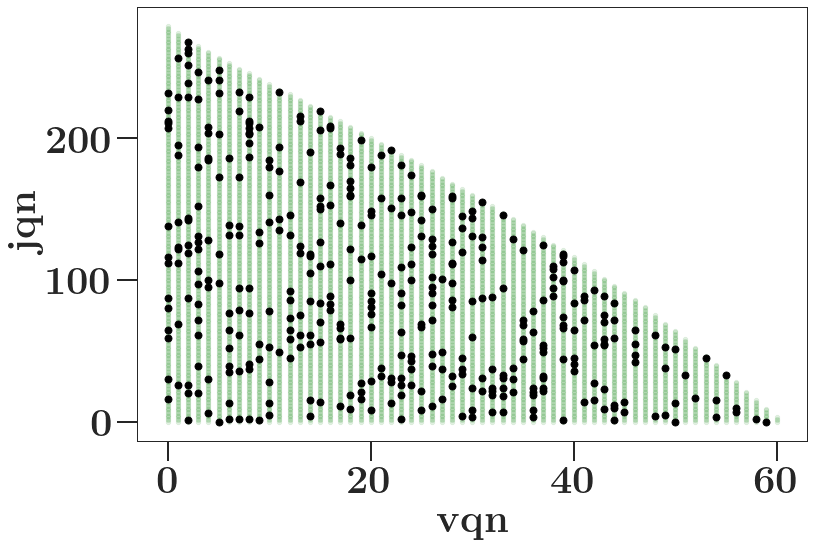

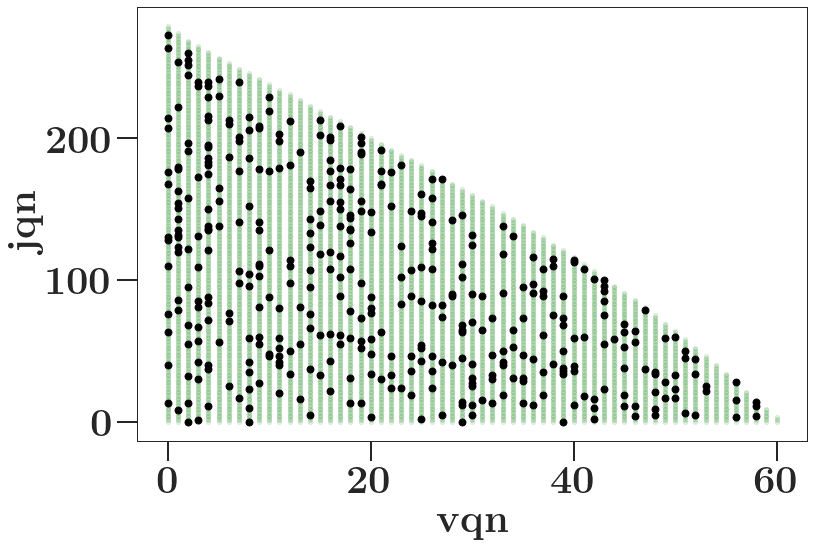

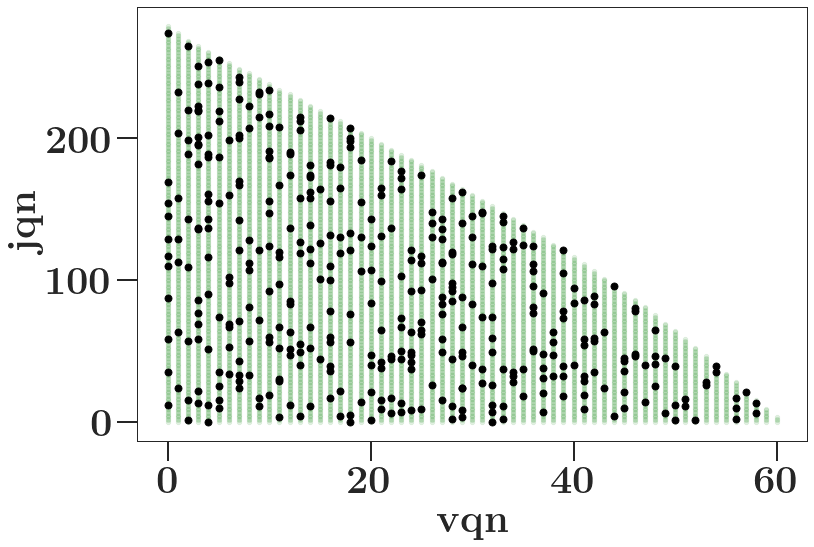

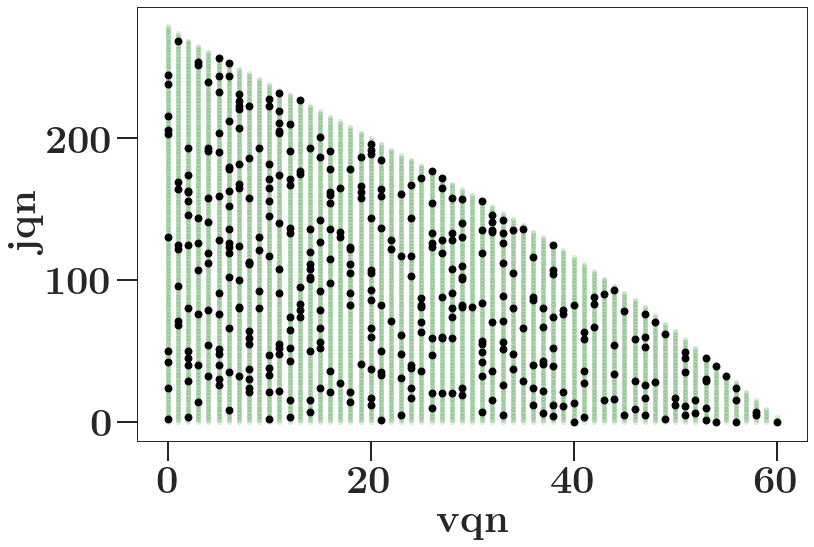

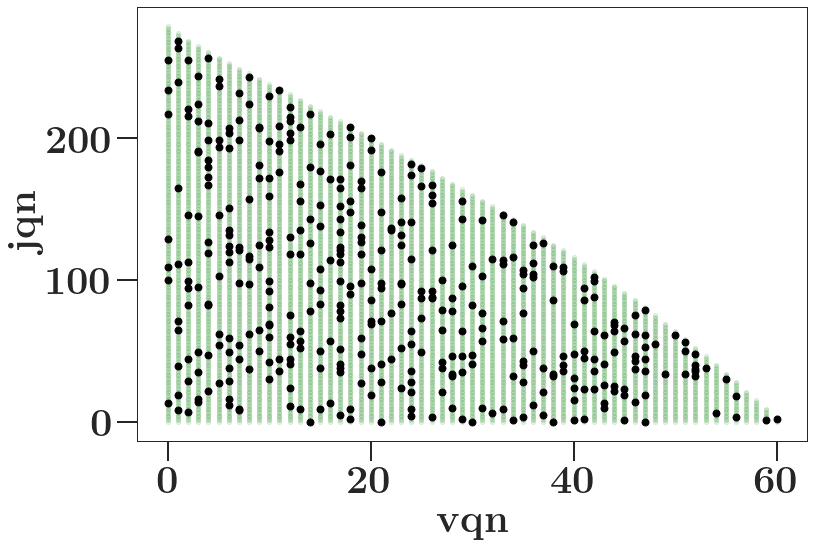

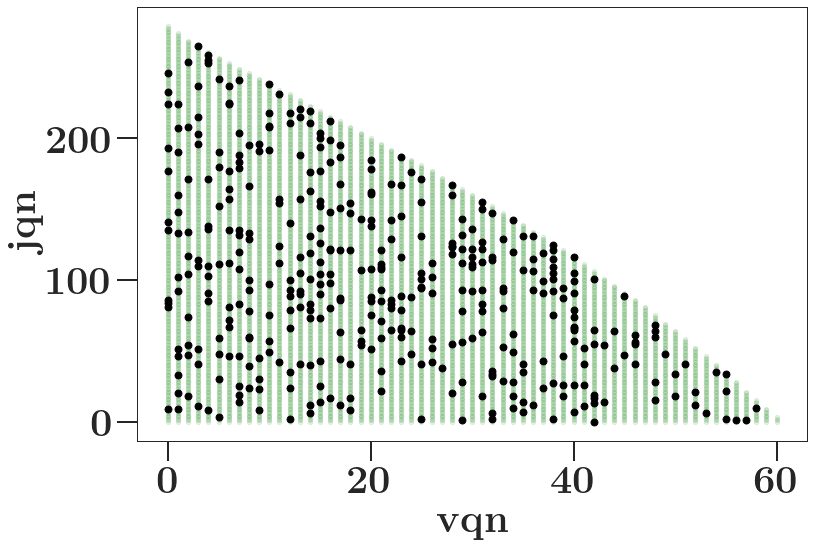

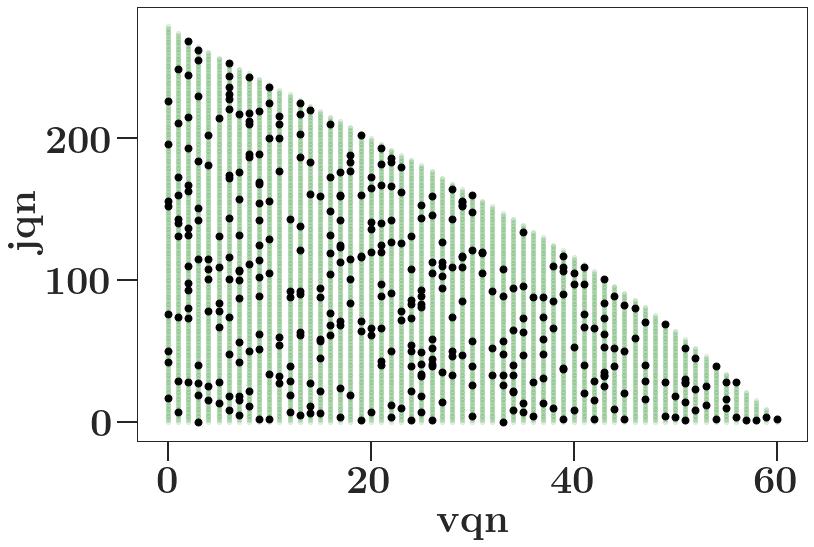

In [8]:
for TTran in TTranVec:
    PathToSampledLevels = InputData.PathToSampledLevels + str(int(TTran)) + 'K.csv'
    print('[SurQCT]:       Reading Sampled Initial Levels List from File: ' + PathToSampledLevels)

    Mask  = pd.read_csv(PathToSampledLevels, header=0)
    Mask  = np.squeeze(Mask.to_numpy())
    fig = plt.figure(figsize=(12,8))
    plt.scatter(DiatData[1]['vqn'], DiatData[1]['jqn'], s=20, c='g',alpha=0.1)
    plt.scatter(DiatData[1]['vqn'][Mask-1], DiatData[1]['jqn'][Mask-1], s=50, c='k')
    plt.xlabel('\\textbf{vqn}')
    plt.ylabel('\\textbf{jqn}')
